In [5]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
from matplotlib import pyplot as plt

In [34]:
# Theta, phi, lambdaz is the params of u3 gate
theta = np.random.normal(0, 0.5)
phi = np.random.normal(0, 0.5)
lambdaz = 0
# Thetas is the param of rz, rx, rz gates
thetas = np.ones([3,])
sim = Aer.get_backend('qasm_simulator')
number_of_shot = 10000
learning_rate = 0.01


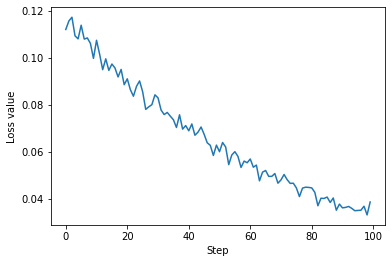

In [38]:
def construct_circuit(thetas):
    """Return one-qubit quantum circuit as instructions

    Args:
        thetas (np array): Params for U_theta gate

    Returns:
        QuantumCircuit
    """
    qc = QuantumCircuit(1, 1)
    qc.initialize([1, 0], 0)
    qc.u3(theta, phi, lambdaz, 0)
    qc.rz(thetas[0], 0)
    qc.rx(thetas[1], 0)
    qc.rz(thetas[2], 0)
    qc.measure(0, 0)
    return qc
def get_l_value(qc):
    """Get P0 values by measurement

    Args:
        qc (QuantumCircuit)

    Returns:
        float: P0
    """
    qobj = assemble(qc, shots = number_of_shot)  
    counts = sim.run(qobj).result().get_counts()
    return counts['0'] / number_of_shot
def grad(thetas1, thetas2):
    qc1 = construct_circuit(thetas1)
    qc2 = construct_circuit(thetas2)
    return get_l_value(qc1) - get_l_value(qc2)

def grad_l(thetas):
    """Calculate gradient of quantum circuit by parameter shift rult
    Here r = 1 and s = pi/4
        np array: grad of thetas
    """
    gradient_l = np.zeros(len(thetas))
    for i in range(0, len(thetas)):
        thetas1, thetas2 = thetas.copy(), thetas.copy()
        thetas1[i] += np.pi/4
        thetas2[i] -= np.pi/4
        gradient_l[i] = grad(thetas1, thetas2)
    return gradient_l

# Calculate loss function in 100 steps
# I confused in this point, is below code right?
ls = []
for i in range(0, 100):
    thetas = thetas + learning_rate*grad_l(thetas)
    l = 1 - get_l_value(construct_circuit(thetas))
    ls.append(l)

plt.plot(ls)
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.show()
    
